In [55]:
#import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [56]:
df = pd.read_csv('bank-full.csv', delimiter = ';')

#### PART 1: EDA

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [58]:
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [59]:
df.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [60]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Numerical Attributes

In [61]:
def box_plot(attribute):
    df[[attribute]].describe().drop(["count"],axis=0).boxplot()
    plt.show()

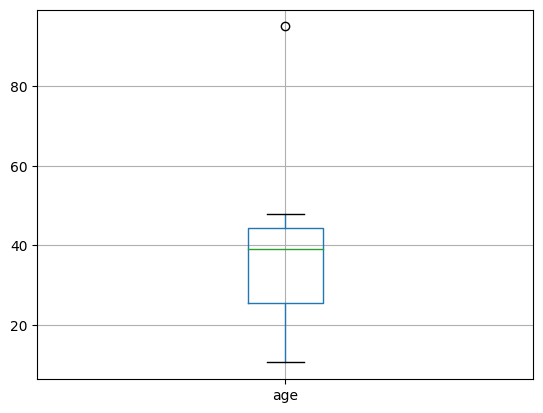

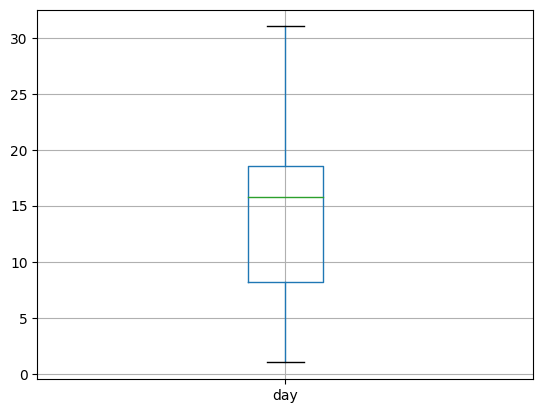

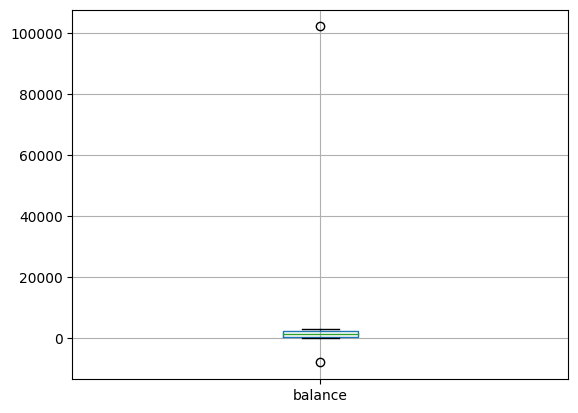

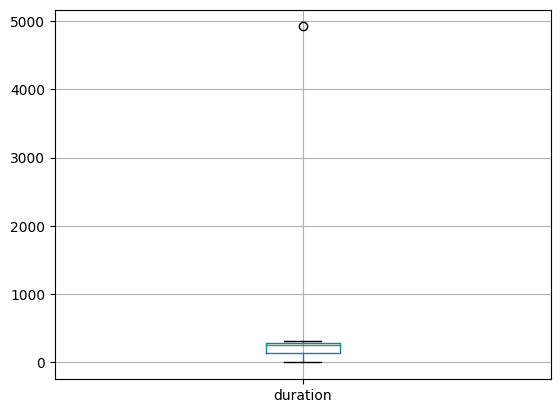

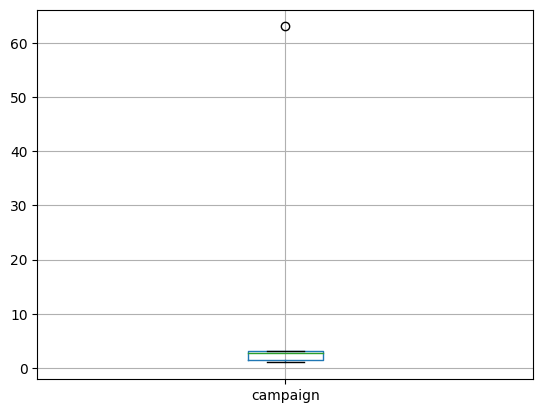

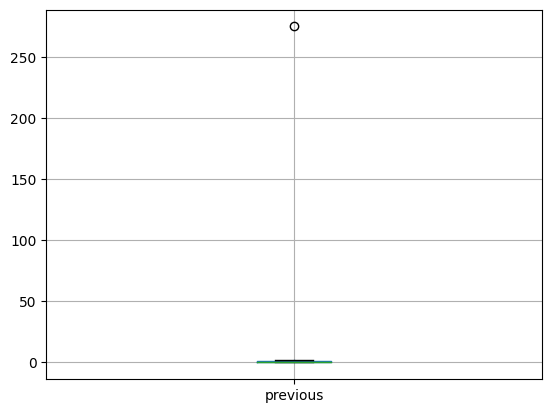

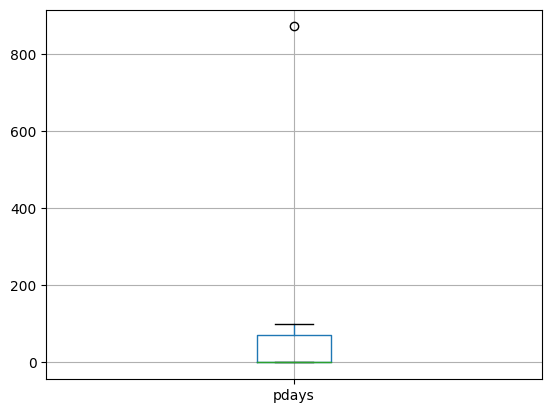

In [62]:
box_plot('age')
box_plot('day')
box_plot('balance')
box_plot('duration')
box_plot('campaign')
box_plot('previous')
box_plot('pdays')

In [63]:
print ("Mean of Numerical Attributes for Output Variable (y)\n")
df.pivot_table(["age", "day", "balance", "duration", "campaign", "previous", "pdays"], ["y"], aggfunc = "mean")

Mean of Numerical Attributes for Output Variable (y)



,age,balance,campaign,day,duration,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,2.846350,15.892290,221.182806,36.421372,0.502154
yes,41.670070,1804.267915,2.141047,15.158253,537.294574,68.702968,1.170354


Categorical Attributes

In [64]:
categorical_attributes = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [65]:
# unique values in categorical attributes
value_counts = df[categorical_attributes].nunique()
print("Value Counts of Categorical Attributes:")
print(value_counts)


Value Counts of Categorical Attributes:
job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64


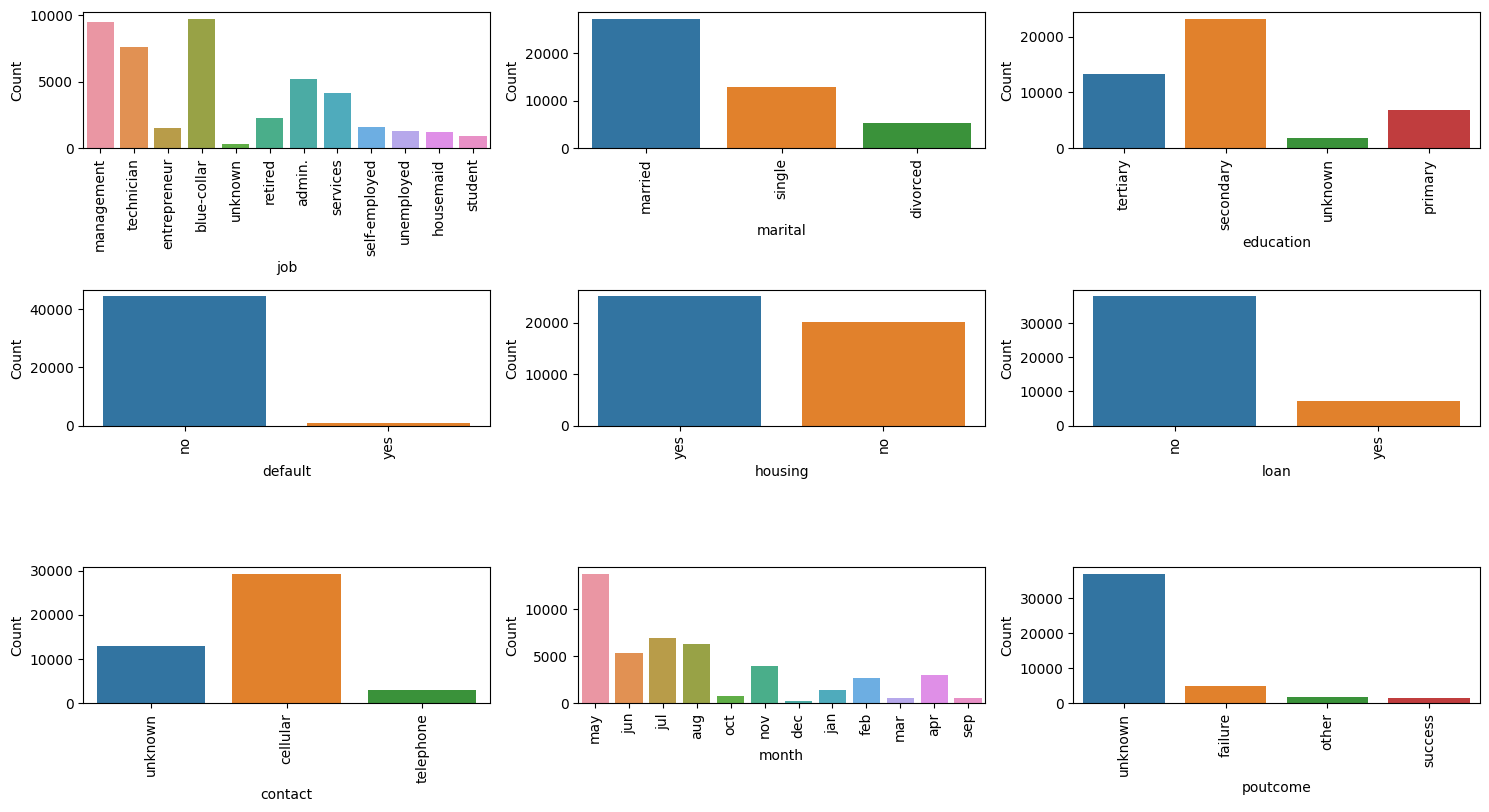

In [66]:
# Check if "count" is in the list of categorical attributes
if "count" in categorical_attributes:
    categorical_attributes.remove("count")

# Create a DataFrame from the categorical attributes
categorical_df = pd.DataFrame(df[categorical_attributes])

# Set the plot size
plt.figure(figsize=(15, 10))

# Loop through each categorical attribute and create count plots
for i, col in enumerate(categorical_df.columns):
    plt.subplot(4, 3, i+1)  # Adjust the subplot layout as per your number of attributes
    sns.countplot(x=col, data=categorical_df)
    plt.xticks(rotation='vertical')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()  # Adjust the spacing between subplots if necessary
plt.show()

In [67]:
def explore_categorical_variables(data, categorical_attributes):
    # Create a DataFrame with the categorical attributes
    categorical_df = data[categorical_attributes]

    # Visualize the count of each category in bar plots
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(categorical_df.columns):
        plt.subplot(4, 3, i+1)  # Adjust the subplot layout as per your number of attributes
        sns.countplot(x=col, data=categorical_df)
        plt.xticks(rotation='vertical')
        plt.xlabel(col)
        plt.ylabel('Count')

    plt.tight_layout()  # Adjust the spacing between subplots if necessary
    plt.show()

    # Compute the ratio of subscription for each category
    for col in categorical_attributes:
        category_counts = data[col].value_counts()
        category_subscription_counts = data.loc[data['y'] == 'yes', col].value_counts()
        ratio = category_subscription_counts / category_counts
        print(f"\nSubscription ratio for {col}:")
        print(ratio)


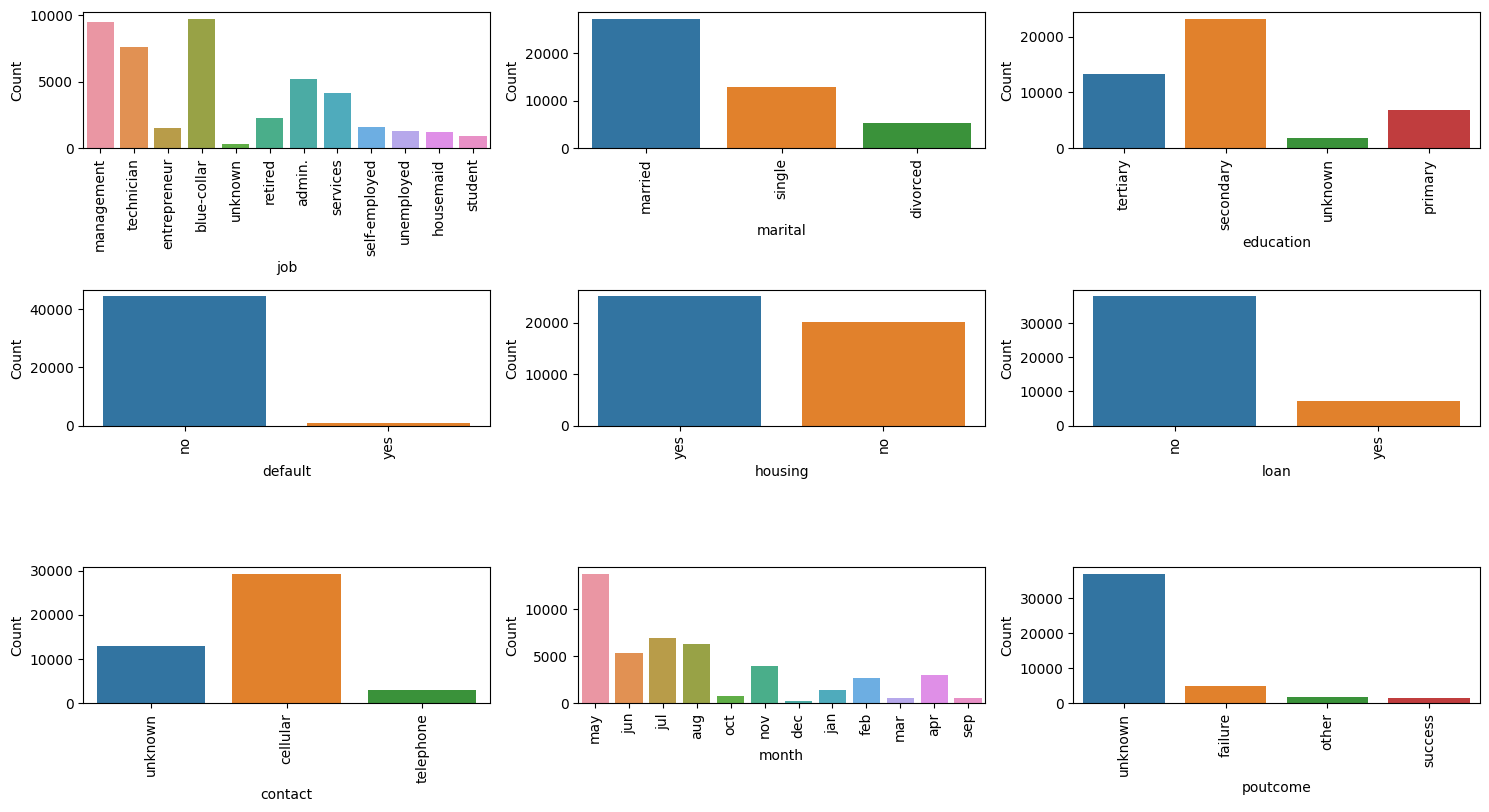


Subscription ratio for job:
admin.           0.122027
blue-collar      0.072750
entrepreneur     0.082717
housemaid        0.087903
management       0.137556
retired          0.227915
self-employed    0.118429
services         0.088830
student          0.286780
technician       0.110570
unemployed       0.155027
unknown          0.118056
Name: job, dtype: float64

Subscription ratio for marital:
married     0.101235
single      0.149492
divorced    0.119455
Name: marital, dtype: float64

Subscription ratio for education:
secondary    0.105594
tertiary     0.150064
primary      0.086265
unknown      0.135703
Name: education, dtype: float64

Subscription ratio for default:
no     0.117961
yes    0.063804
Name: default, dtype: float64

Subscription ratio for housing:
no     0.167024
yes    0.077000
Name: housing, dtype: float64

Subscription ratio for loan:
no     0.126557
yes    0.066814
Name: loan, dtype: float64

Subscription ratio for contact:
cellular     0.149189
unknown      0.040

In [68]:
explore_categorical_variables(df, categorical_attributes)

Subscription ratio of the number of clients who subscribe the product to the total number of clients in that specific job category :

1. student (ratio=0.286)

2. retired(ratio=0.227) 

3. unemployed(ratio=0.155)

While the majority of the clients are married, it seems that the clients who are single are the group that provides the highest subscribe rate among all

The clients who have tertiary and unknown education background are the groups that provides the highest subscribe rate among all.

The clients with no hosing loan are more willing to subscibe the product

The clients with no personal loans are more willing to subscibe the product

The clients who are contacted by cell phone are more willing to subscibe the product

May, July, and August are the top 3 months that the majority of clients are last contacted - according to bar plot

According to the quantitative table, March, December, and September have the highest rates for the clients to subscribe the product.

when looking at the yes/no distribution corresponded to the category, the success category, and the other category are the top 2 groups among all.

Remove Outliers - Numerical Attributes

Z-Score method

In [69]:
# remove rows that contain outliers for numerical variables

Q1 = df[["age", "balance", "day", "duration", "pdays", "previous"]].describe().T["25%"]
Q3 = df[["age", "balance", "day", "duration", "pdays", "previous"]].describe().T["75%"].T
IQR = (Q3 - Q1)

df.drop(df[df.age < (Q1.age - 3 * IQR.age)].index, inplace=True)
df.drop(df[df.age > (Q3.age + 3 * IQR.age)].index, inplace=True)

df.drop(df[df.balance < (Q1.balance - 3 * IQR.balance)].index, inplace=True)
df.drop(df[df.balance > (Q3.balance + 3 * IQR.balance)].index, inplace=True)

df.drop(df[df.duration < (Q1.duration - 3 * IQR.duration)].index, inplace=True)
df.drop(df[df.duration > (Q1.duration + 3 * IQR.duration)].index, inplace=True)

df.drop(df[df.pdays < (Q1.pdays - 3 * IQR.pdays)].index, inplace=True)
df.drop(df[df.pdays > (Q3.pdays + 3 * IQR.pdays)].index, inplace=True)

df.drop(df[df.previous < (Q1.previous - 3 * IQR.previous)].index, inplace=True)
df.drop(df[df.previous > (Q3.previous + 3 * IQR.previous)].index, inplace=True)




Data Imputation


For some categorical attributes such as job, education, and contact since their unknown category is the minority among all other categories for these attribute; replace the unknown placeholder with the mode category for that attribute.

In [70]:
categorical_attributes = ["job", "education", "contact"]

for attribute in categorical_attributes:
    mode_category = df[attribute].mode()[0]
    df[attribute] = df[attribute].replace("unknown", mode_category)


Data Transformation

In [71]:
# transform data and normalize the data

df_data = df.drop(df[["y"]], axis=1)
df_data = pd.get_dummies(df_data)

target = df[["y"]]
target.replace("yes", 1, inplace=True)
target.replace("no", 0, inplace=True)

df_table = pd.concat([df_data, target], axis=1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_data_normal = scaler.fit_transform(df_table)

target_split = df_data_normal[:, -1]
xdata_split = df_data_normal[:, :-1]


<ipython-input-71-1607c6d7369e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.replace("yes", 1, inplace=True)
<ipython-input-71-1607c6d7369e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.replace("no", 0, inplace=True)


Train-test split

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xdata_split, target_split, test_size=0.2, random_state=100)

In [73]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)
target_df = pd.DataFrame(target)

X_train_df.to_csv("X_train.csv", index=False)
X_test_df.to_csv("X_test.csv", index=False)
y_train_df.to_csv("y_train.csv", index=False)
y_test_df.to_csv("y_test.csv", index=False)
target_df.to_csv("target.csv", index=False)

#### PART 2: Customer Segmentation Analyis

In [74]:
#load the data
x=pd.read_csv("X_train.csv")
y=pd.read_csv("y_train.csv")
if "Unnamed: 0" in x.columns:
    x.drop(["Unnamed: 0"], axis=1, inplace=True)

if "Unnamed: 0" in y.columns:
    y.drop(["Unnamed: 0"], axis=1, inplace=True)

data_train_x_y = pd.concat([x, y], axis=1)


features with variance <0.1
   filter out features
0                  age
1              balance
2                  day
3             duration
4             campaign
5                pdays
6             previous
7     job_entrepreneur
8        job_housemaid
9          job_retired
10   job_self-employed
11        job_services
12         job_student
13      job_unemployed
14          default_no
15         default_yes
16    contact_cellular
17   contact_telephone
18           month_apr
19           month_dec
20           month_feb
21           month_jan
22           month_mar
23           month_nov
24           month_oct
25           month_sep
26    poutcome_unknown
27                   y

features with variance >0.1
    variance              feature
0   0.247989          housing_yes
1   0.247989           housing_no
2   0.246300  education_secondary
3   0.238567      marital_married
4   0.214571            month_may
5   0.202341   education_tertiary
6   0.200065       marital_single
7  

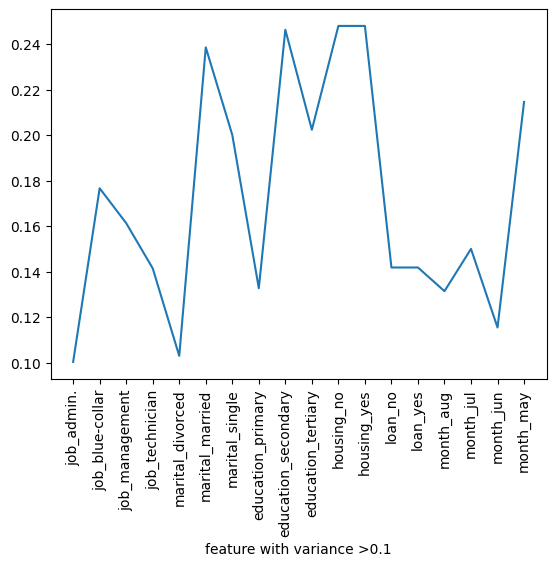

In [75]:
# Feature selection by variance with sklearn VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
train_data_A_fs=selector.fit_transform(data_train_x_y)

selected_variances=selector.variances_[selector.get_support(indices=True)]
name=df_table.columns.values[selector.get_support(indices =True)]
variance_tb=pd.DataFrame(sorted(zip(selected_variances,name),reverse=True),columns=["variance","feature"])

#filter out the variance <0.1 
filter_out=[]
for i in df_table.columns.values:
    if i not in (df_table.columns.values[selector.get_support(indices =True)]):
        filter_out.append(i)
filter_out_tb=pd.DataFrame(filter_out,columns=["filter out features"])


plt.plot(name,selected_variances)
plt.xticks(rotation='vertical')
plt.xlabel("feature with variance >0.1")

print ("\nfeatures with variance <0.1")
print (filter_out_tb)

print ("\nfeatures with variance >0.1")
print (variance_tb)

K-Means Clustering:
1. Elbow Method
2. Silhouette Method



In [76]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cluster_range=range(2,18,2)
intra_class_similarity=[]
silhouette_avg1=[]


for i in cluster_range:
    kmeans_optimal=KMeans(n_clusters=i,max_iter=500,random_state=88)
    kmeans_optimal.fit(train_data_A_fs)
    intra_class_similarity.append(kmeans_optimal.inertia_)
    prediction=kmeans_optimal.fit_predict(train_data_A_fs)
    silhouette_avg1.append(silhouette_score(train_data_A_fs,prediction,sample_size=1000))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

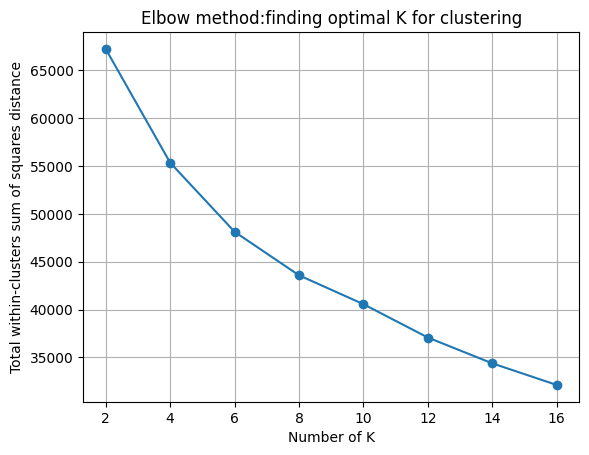

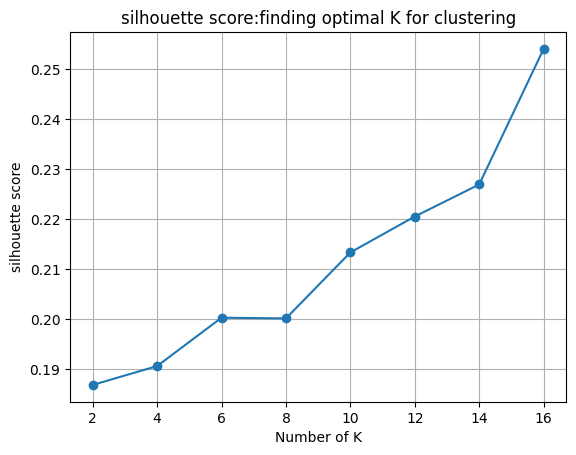

   # of K      Distance
0       2  67219.166866
1       4  55348.820562
2       6  48131.462269
3       8  43585.682852
4      10  40571.153670
5      12  37087.348175
6      14  34393.520069
7      16  32136.618973

    # of K  Silhouette Score
0       2          0.186883
1       4          0.190651
2       6          0.200318
3       8          0.200177
4      10          0.213369
5      12          0.220551
6      14          0.226952
7      16          0.254055


In [77]:
find_k=zip(cluster_range,intra_class_similarity)
find_k1=pd.DataFrame(find_k,columns=["# of K","Distance"])

find_k2=zip(cluster_range,silhouette_avg1)
find_k3=pd.DataFrame(find_k2,columns=["# of K","Silhouette Score"])

plt.grid(True)
plt.plot(cluster_range,intra_class_similarity,marker = "o")
plt.title("Elbow method:finding optimal K for clustering")
plt.ylabel("Total within-clusters sum of squares distance")
plt.xlabel("Number of K")
plt.show()

plt.grid(True)
plt.plot(cluster_range,silhouette_avg1,marker = "o")
plt.title("silhouette score:finding optimal K for clustering")
plt.ylabel("silhouette score")
plt.xlabel("Number of K")
plt.show()


print (find_k1)
print ("\n",find_k3)

In [78]:
#evaluate the results when k=16

kmeans_optimal=KMeans(n_clusters=16,max_iter=500,random_state=97)
kmeans_optimal.fit(train_data_A_fs)
cluster_prediction=kmeans_optimal.predict(train_data_A_fs)
silhouette_score(train_data_A_fs,cluster_prediction,sample_size=1000)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.21476803753996637

[0.20166151 0.14471247]


/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


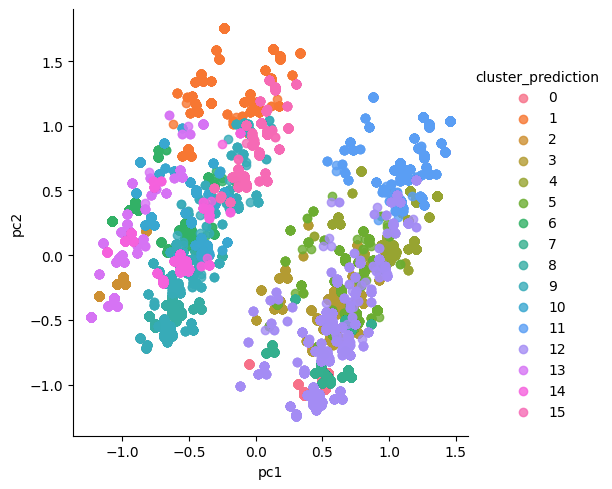

Text(0, 0.5, 'PC2')

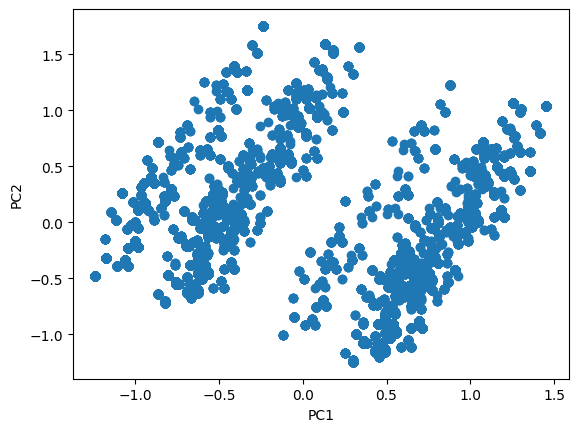

In [79]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
trans_train=pca.fit(train_data_A_fs).transform(train_data_A_fs)

print(pca.explained_variance_ratio_) 
pc1=pd.DataFrame(trans_train[:,0],columns=["pc1"])
pc2=pd.DataFrame(trans_train[:,1],columns=["pc2"])
pcs=pd.concat([pc1,pc2],axis=1)
cluster_prediction1=pd.DataFrame(cluster_prediction,columns=["cluster_prediction"])
cluster_plot=pd.concat([pcs,cluster_prediction1],axis=1)

sns.lmplot(data=cluster_plot, x='pc1', y='pc2', hue='cluster_prediction', fit_reg=False, legend=True, legend_out=True)
plt.show()


plt.scatter(cluster_plot.pc1,cluster_plot.pc2)
plt.xlabel("PC1")
plt.ylabel("PC2")

**Plot 1** shows the outcome of K-means clustering with k=16. Based on the Silhouette score, when k=16, the score reaches 0.2509, which is the highest among the plotted values. However, the score's proximity to 0 suggests that there is significant overlap between clusters in higher dimensions, indicating limited distinctiveness among the clusters.

**Plot 2** illustrates the representation of the original data, consisting of 17 features, on a 2D plot. The data is transformed into a lower-dimensional space using two principal components, which individually capture 0.2 and 0.14 variance from the original data. This plot provides a visual understanding of the data distribution and its condensed representation in the reduced space.

Customer Segmentation Analysis

In [80]:
# Create tables to map the observation with its y values and predicted cluster labels
fs_column_index = df_table.columns.values[selector.get_support(indices=True)]
fs_index_tb = pd.DataFrame(train_data_A_fs, columns=fs_column_index)
target_tb = pd.DataFrame(target, columns=["y"])

tb_fs_without_y = pd.concat([fs_index_tb, cluster_prediction1], axis=1)
tb_fs_with_y = pd.concat([tb_fs_without_y, target_tb], axis=1)


In [81]:
# Create dataframe for different clusters for further analysis
cluster_counts = []
for i in range(16):
    cluster = tb_fs_with_y[tb_fs_with_y['cluster_prediction'] == i]
    cluster_0_count = cluster[cluster['y'] == 0].shape[0]
    cluster_1_count = cluster[cluster['y'] == 1].shape[0]
    cluster_counts.append(pd.DataFrame({'Cluster': i, 'Count_0': cluster_0_count, 'Count_1': cluster_1_count}, index=[0]))

cluster_counts_df = pd.concat(cluster_counts, ignore_index=True)

1. ratio of the clients who subscribe the product to the total number of clients in the cluster

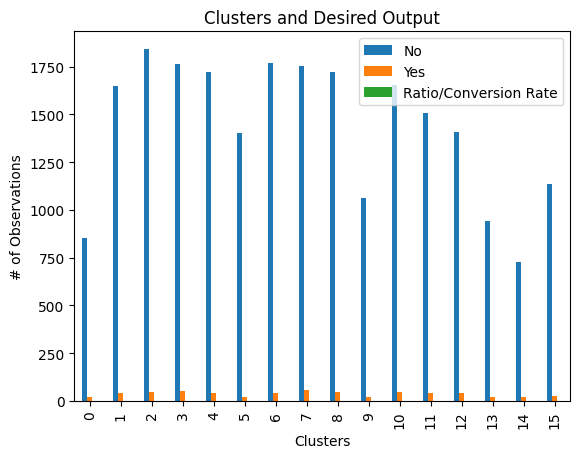

,No,Yes,Ratio/Conversion Rate
0,854,20,0.022883
1,1647,44,0.026020
2,1842,47,0.024881
3,1763,53,0.029185
4,1723,41,0.023243
5,1402,21,0.014758
6,1768,41,0.022664
7,1751,58,0.032062
8,1724,49,0.027637
9,1061,22,0.020314


In [82]:
# Calculate ratio and create tb dataframe
tb = pd.concat([cluster_counts_df["Count_0"], cluster_counts_df["Count_1"]], axis=1)
tb.columns = ["No", "Yes"]
tb["Ratio/Conversion Rate"] = tb["Yes"] / (tb["No"] + tb["Yes"])

# Plotting the bar chart
tb.plot(kind="bar")
plt.title("Clusters and Desired Output")
plt.xlabel("Clusters")
plt.ylabel("# of Observations")
plt.show()

# Create ratio_tb dataframe
ratio_tb = tb.copy()
ratio_tb.columns = ["No", "Yes", "Ratio/Conversion Rate"]
ratio_tb

The top 4 clusters with their conversion rates are:

Cluster 7 - Conversion Rate: 0.032062

Cluster 3 - Conversion Rate: 0.029185

Cluster 8 - Conversion Rate: 0.027637

Cluster 1 - Conversion Rate: 0.026020

In [83]:
# To transform the values back to their original state in 37 features, create a new object scaler2
transform = df_data[fs_column_index.tolist()]
scaler2 = MinMaxScaler()
scaler2.fit(transform)


MinMaxScaler()

2. Cluster Representation 

,mean
education_secondary,1.000000
marital_married,1.000000
loan_no,1.000000
housing_no,1.000000
month_aug,0.395914
job_technician,0.343385
month_jul,0.170720
job_admin.,0.169261
month_may,0.097276
job_management,0.083658


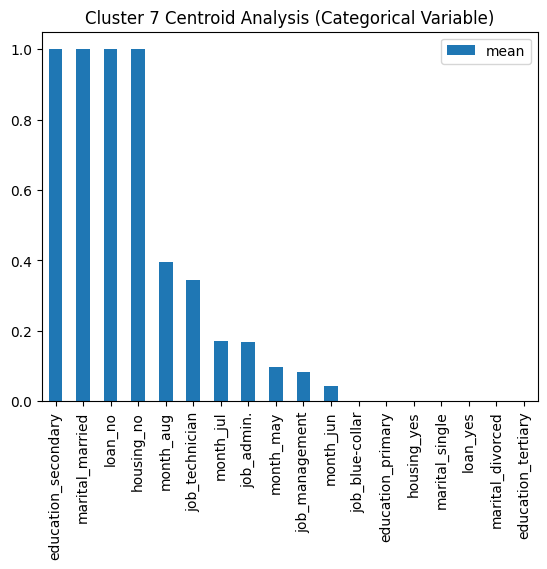

In [84]:
# Cluster 7 customer characteristics
cluster_7 = tb_fs_with_y[tb_fs_with_y['cluster_prediction'] == 7]
c7_1 = cluster_7.drop(["cluster_prediction", "y"], axis=1)
columns_without_py = c7_1.columns.values

cluster_7_transformed = pd.DataFrame(scaler2.inverse_transform(c7_1), columns=columns_without_py)

cluster_7_characteristics = pd.DataFrame(cluster_7_transformed.describe().T["mean"]).sort_values(by="mean", ascending=False)

cluster_7_characteristics.plot(kind="bar")
plt.title("Cluster 7 Centroid Analysis (Categorical Variable)")

cluster_7_characteristics


In **Cluster 7**, the highest ratio of customers who subscribed to the product (yes) is observed among those with secondary education (education_secondary), who are married (marital_married), have no loan (loan_no), and do not own a house (housing_no).

,mean
loan_no,1.000000
education_secondary,1.000000
housing_no,1.000000
marital_single,0.720595
job_technician,0.286126
marital_divorced,0.279405
month_aug,0.211234
month_jul,0.183869
job_admin.,0.166107
month_jun,0.163706


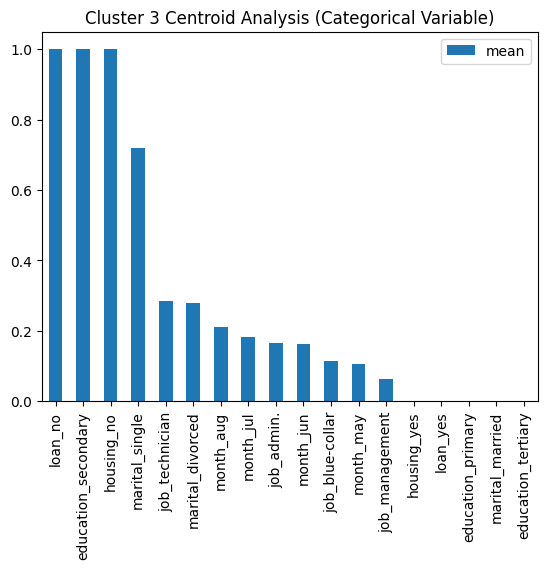

In [85]:
cluster_3 = tb_fs_with_y[tb_fs_with_y['cluster_prediction'] == 3]
c3_1 = cluster_3.drop(["cluster_prediction", "y"], axis=1)
columns_without_py = c3_1.columns.values

cluster_3_transformed = pd.DataFrame(scaler2.inverse_transform(c3_1), columns=columns_without_py)

cluster_3_characteristics = pd.DataFrame(cluster_3_transformed.describe().T["mean"]).sort_values(by="mean", ascending=False)

cluster_3_characteristics.plot(kind="bar")
plt.title("Cluster 3 Centroid Analysis (Categorical Variable)")

cluster_3_characteristics

In **Cluster 3**, the highest "yes" ratio for subscribing to the product is associated with customers who have a marital status of single (marital_single). Other influential features include job position in administration (job_admin.), the month of August (month_aug), and the month of July (month_jul).

,mean
loan_no,1.000000
marital_married,1.000000
education_secondary,1.000000
housing_yes,1.000000
month_jul,0.363231
job_blue-collar,0.288900
month_jun,0.201685
job_technician,0.198216
job_admin.,0.168979
month_aug,0.078791


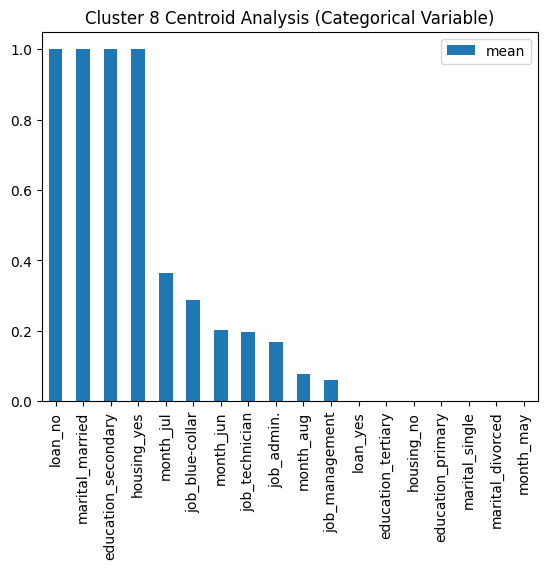

In [86]:
cluster_8 = tb_fs_with_y[tb_fs_with_y['cluster_prediction'] == 8]
c8_1 = cluster_8.drop(["cluster_prediction", "y"], axis=1)
columns_without_py = c8_1.columns.values

cluster_8_transformed = pd.DataFrame(scaler2.inverse_transform(c8_1), columns=columns_without_py)

cluster_8_characteristics = pd.DataFrame(cluster_8_transformed.describe().T["mean"]).sort_values(by="mean", ascending=False)

cluster_8_characteristics.plot(kind="bar")
plt.title("Cluster 8 Centroid Analysis (Categorical Variable)")

cluster_8_characteristics

In **Cluster 8**, the most influential features for customers subscribing to the product are having no loan (loan_no), being married (marital_married), having secondary education (education_secondary), and having housing (housing_yes). The highest subscription ratio is observed for the feature "loan_no" with a ratio of 1.

,mean
housing_yes,1.000000
education_tertiary,0.997393
loan_no,0.924922
month_may,0.664755
marital_single,0.637122
job_management,0.598019
marital_married,0.274765
job_technician,0.164234
marital_divorced,0.088113
month_jul,0.083420


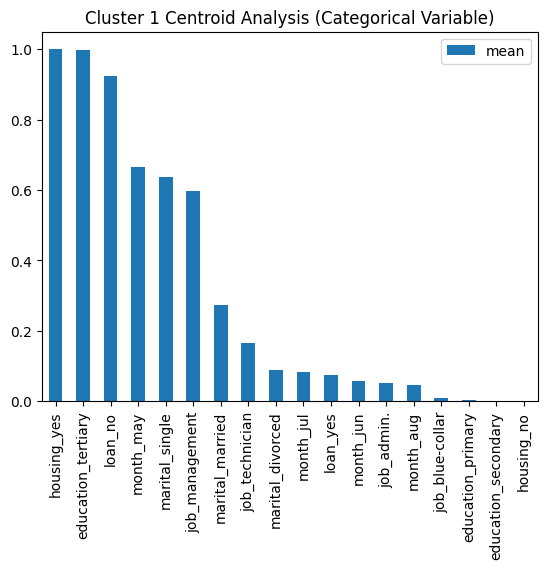

In [87]:
# Cluster 1 customer characteristics
cluster_1 = tb_fs_with_y[tb_fs_with_y['cluster_prediction'] == 1]
c1_1 = cluster_1.drop(["cluster_prediction", "y"], axis=1)
columns_without_py = c1_1.columns.values

cluster_1_transformed = pd.DataFrame(scaler2.inverse_transform(c1_1), columns=columns_without_py)

cluster_1_characteristics = pd.DataFrame(cluster_1_transformed.describe().T["mean"]).sort_values(by="mean", ascending=False)

cluster_1_characteristics.plot(kind="bar")
plt.title("Cluster 1 Centroid Analysis (Categorical Variable)")

cluster_1_characteristics


In **Cluster 1**, the highest ratio of customers who subscribed to the product (yes ratio) is associated with having housing (housing_yes) and tertiary education (education_tertiary), while having a loan (loan_no) and being in a secondary education level (education_secondary) are less influential factors.

3. significant features that most influence the customers in the cluster to subscribe the product


Significant Features:
  Weight       Feature Names
2.583666           month_jun
2.511076          job_admin.
1.962387      job_management
1.085637           month_may
0.488340           month_jul
0.281920           month_aug
0.184975      job_technician
0.000000             loan_no
0.000000          housing_no
0.000000 education_secondary



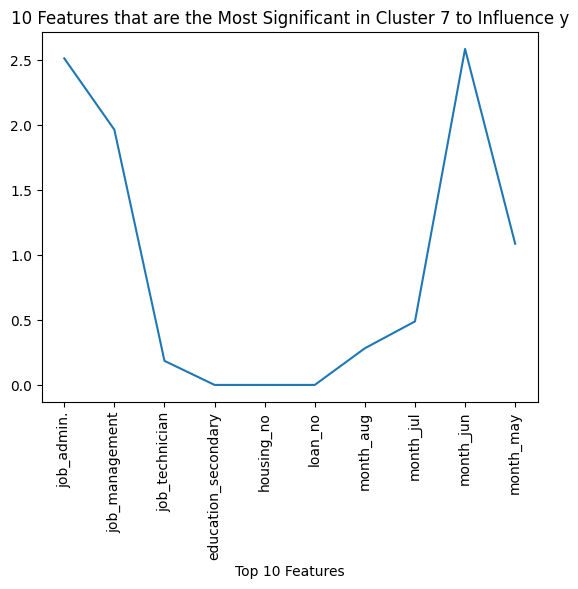

In [95]:
# Remove NaN values from the target variable
c7_t = cluster_7["y"].dropna()

# Remove corresponding rows with NaN values from the feature matrix
c7_1_cleaned = c7_1.loc[c7_t.index]

fs7 = feature_selection.SelectKBest(feature_selection.chi2, k=10)
X_train_fs7 = fs7.fit_transform(c7_1_cleaned, c7_t)
c7_ftb = sorted(zip(fs7.scores_[fs7.get_support()], columns_without_py[fs7.get_support()]), reverse=True)
c7_ftb = pd.DataFrame(c7_ftb, columns=["Weight", "Feature Names"])

plt.title("10 Features that are the Most Significant in Cluster 7 to Influence y")
plt.xlabel("Top 10 Features")
plt.plot(columns_without_py[fs7.get_support()], fs7.scores_[fs7.get_support()])
plt.xticks(rotation="vertical")

print("Significant Features:")
print(c7_ftb.to_string(index=False))

print()



In **Cluster 7**, the most significant features that influence the likelihood of customers subscribing to the product are the month of June, job position in administration, and job position in management.

Significant Features:
  Weight    Feature Names
1.491837        month_jun
0.963454        month_jul
0.804013 marital_divorced
0.306320   marital_single
0.280182        month_may
0.114906   job_management
0.104857        month_aug
0.013102       job_admin.
0.012395  job_blue-collar
0.000242   job_technician



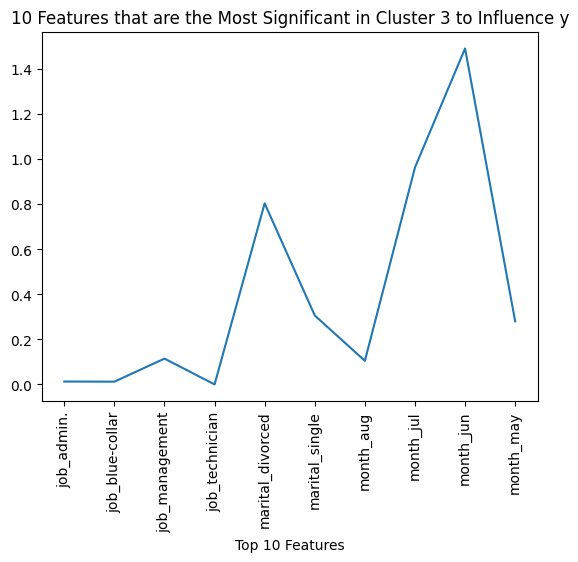

In [96]:
# Remove NaN values from the target variable
c3_t = cluster_3["y"].dropna()

# Remove corresponding rows with NaN values from the feature matrix
c3_1_cleaned = c3_1.loc[c3_t.index]

fs3 = feature_selection.SelectKBest(feature_selection.chi2, k=10)
X_train_fs3 = fs3.fit_transform(c3_1_cleaned, c3_t)
c3_ftb = sorted(zip(fs3.scores_[fs3.get_support()], columns_without_py[fs3.get_support()]), reverse=True)
c3_ftb = pd.DataFrame(c3_ftb, columns=["Weight", "Feature Names"])

plt.title("10 Features that are the Most Significant in Cluster 3 to Influence y")
plt.xlabel("Top 10 Features")
plt.plot(columns_without_py[fs3.get_support()], fs3.scores_[fs3.get_support()])
plt.xticks(rotation="vertical")

print("Significant Features:")
print(c3_ftb.to_string(index=False))

print()


In **Cluster 3**, the months of June and July, along with divorced customers, are the most influential factors in influencing the outcome variable 'y'.

Significant Features:
  Weight       Feature Names
4.035963           month_aug
3.126450      job_management
1.675434          job_admin.
0.962051           month_jun
0.306573      job_technician
0.109111           month_jul
0.091739     job_blue-collar
0.000000             loan_no
0.000000         housing_yes
0.000000 education_secondary



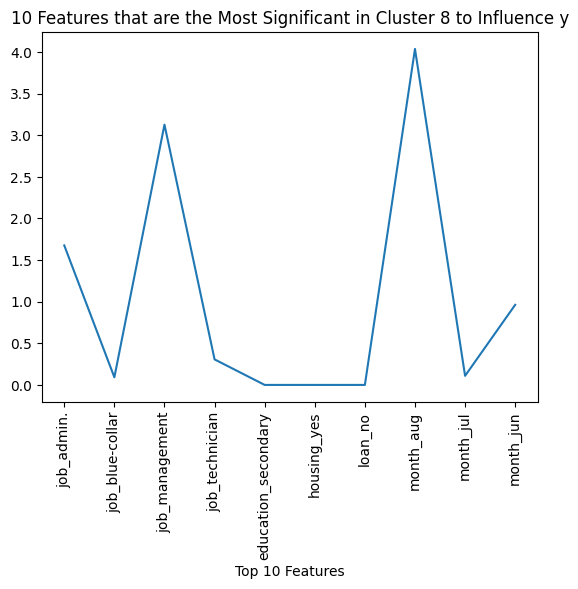

In [97]:
# Remove NaN values from the target variable
c8_t = cluster_8["y"].dropna()

# Remove corresponding rows with NaN values from the feature matrix
c8_1_cleaned = c8_1.loc[c8_t.index]

fs8 = feature_selection.SelectKBest(feature_selection.chi2, k=10)
X_train_fs8 = fs8.fit_transform(c8_1_cleaned, c8_t)
c8_ftb = sorted(zip(fs8.scores_[fs8.get_support()], columns_without_py[fs8.get_support()]), reverse=True)
c8_ftb = pd.DataFrame(c8_ftb, columns=["Weight", "Feature Names"])

plt.title("10 Features that are the Most Significant in Cluster 8 to Influence y")
plt.xlabel("Top 10 Features")
plt.plot(columns_without_py[fs8.get_support()], fs8.scores_[fs8.get_support()])
plt.xticks(rotation="vertical")

print("Significant Features:")
print(c8_ftb.to_string(index=False))
print()

In **Cluster 8**, the most influential factors for customers' decision to subscribe to the product are the month of August and job positions in management.

Significant Features:
  Weight     Feature Names
0.400729   job_blue-collar
0.789194    job_management
1.978657    job_technician
0.254963   marital_married
0.115002    marital_single
0.133576 education_primary
0.578376         month_aug
0.668838         month_jul
0.143004         month_jun
0.063817         month_may


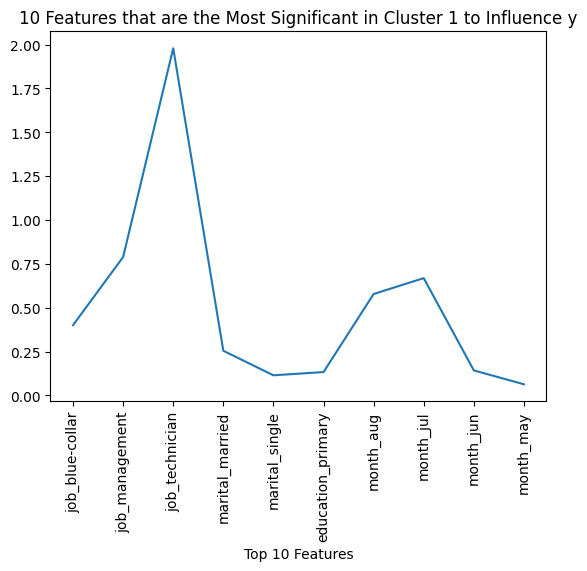

In [107]:
c1_t = cluster_1["y"].dropna()
c1_1_cleaned = c1_1.loc[c1_t.index]

fs1 = feature_selection.SelectKBest(feature_selection.chi2, k=10)
X_train_fs = fs1.fit_transform(c1_1_cleaned, c1_t)
selected_features = columns_without_py[fs1.get_support()]
c1_ftb = pd.DataFrame(zip(fs1.scores_[fs1.get_support()], selected_features), columns=["Weight", "Feature Names"])

plt.title("10 Features that are the Most Significant in Cluster 1 to Influence y")
plt.xlabel("Top 10 Features")
plt.plot(selected_features, fs1.scores_[fs1.get_support()])
plt.xticks(rotation='vertical')

print("Significant Features:")
print(c1_ftb.to_string(index=False))

In **Cluster 1**, the months of July, August, and June, job position technician along with the married customers are influential factors in their decision to subscribe to the product.